# **Purpose**

...patch selection for modeling...

# **Imports & Settings**

In [3]:
from utils_dataloaders import *
from utils_training import *

import glob
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


##### set dataframe display options 
# show decimal format (not scientific notation)
pd.options.display.float_format = '{:.4f}'.format

# display all columns
pd.set_option('display.max_columns', None)

# **Random Selection**

...all patches randomly selected from same area...

## *Parameters*

In [2]:
#########################
# Setup Patches Directory
#########################

# directory for patch selections
patch_dir = r'../models/patches'
if not os.path.isdir(patch_dir):
    os.makedirs(patch_dir)

In [2]:
#############
# Parameters
#############

warren_patches_geojson = r'../data/warren/patches_256_50.geojson'

hardin_patches_geojson = [r'../data/howevalley/hv_patches_256_50.geojson', 
                          r'../data/sonora/sonora_patches_256_50.geojson']

test_size = 1536

val_size = 768

patch_seed=111


labels_path = glob.glob(r'../data/warren/*labels.csv')[0]
areas_path = glob.glob(r'../data/warren/*areas.csv')[0]

hardin_labels_path = glob.glob(r'../data/hardin/*labels.csv')[0]
hardin_areas_path = glob.glob(r'../data/hardin/*areas.csv')[0]

## *Train/Validation/Test Sets, Warren County*

...all patches from Warren County area...

In [4]:
#########################################################
# Select Spatially Independent & Non-Overlapping Patches
#########################################################

##### read patches GeoJSON into geodataframe
gdf = gpd.read_file(warren_patches_geojson)

##### select test set
gdf_test, gdf_remaining = randomly_select_indpendent_patch_sets(gdf, test_size, seed=patch_seed)

##### select validatin & training sets
gdf_val, gdf_train = randomly_select_indpendent_patch_sets(gdf_remaining, val_size, seed=patch_seed)

##### save training, validation, & testing patches
gdf_train.to_file(f"{patch_dir}/warren_patches_train.geojson", driver='GeoJSON')
gdf_val.to_file(f"{patch_dir}/warren_patches_val.geojson", driver='GeoJSON')
gdf_test.to_file(f"{patch_dir}/warren_patches_test.geojson", driver='GeoJSON')

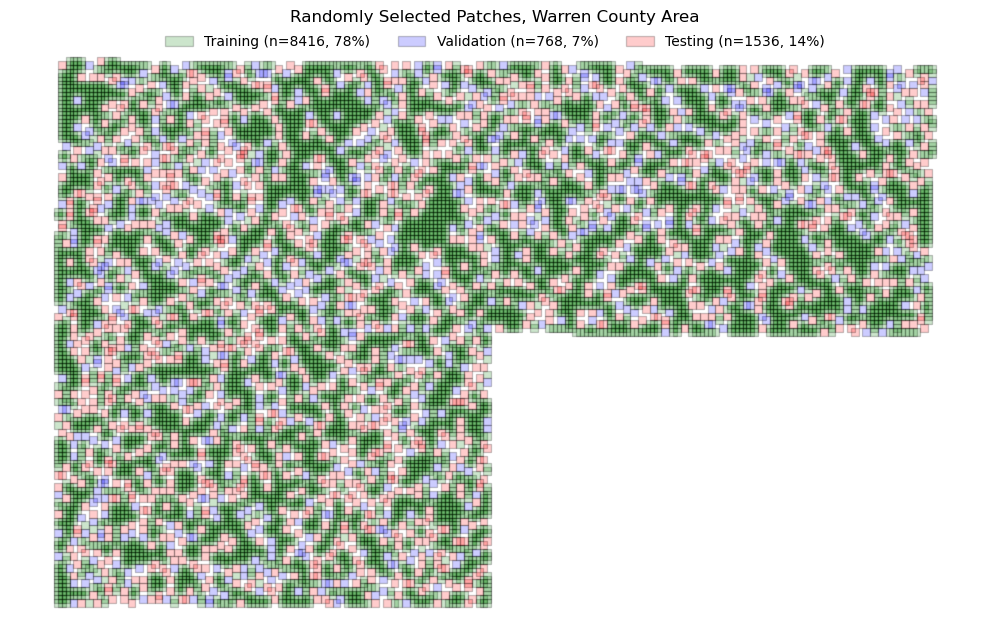

In [5]:
#############################
# Visualize Selected Patches
#############################

##### plot patches
fig, ax = plt.subplots(figsize=(10,8))

# plot
gdf_train.plot(ax=ax, facecolor='green', edgecolor='k', linewidth=1, alpha=0.2, label='Training')
gdf_val.plot(ax=ax, facecolor='blue', edgecolor='k', linewidth=1, alpha=0.2, label='Validation')
gdf_test.plot(ax=ax, facecolor='red', edgecolor='k', linewidth=1, alpha=0.2, label='Testing')

# count information
total_patches = len(gdf_train) + len(gdf_val) + len(gdf_test)
train_percent = len(gdf_train) / total_patches * 100
val_percent = len(gdf_val) / total_patches * 100
test_percent = len(gdf_test) / total_patches * 100

# legend labels
train_subtitle = f"Training (n={len(gdf_train)}, {int(train_percent)}%)"
val_subtitle = f"Validation (n={len(gdf_val)}, {int(val_percent)}%)"
test_subtitle = f"Testing (n={len(gdf_test)}, {int(test_percent)}%)"

# legend patches
train_patch = Patch(facecolor='green', edgecolor='k', linewidth=1, alpha=0.2, label=train_subtitle)
val_patch = Patch(facecolor='blue', edgecolor='k', linewidth=1, alpha=0.2, label=val_subtitle)
test_patch = Patch(facecolor='red', edgecolor='k', linewidth=1, alpha=0.2, label=test_subtitle)
ax.legend(handles=[train_patch, val_patch, test_patch], loc='center', bbox_to_anchor=(0.5, 0.98), frameon=False, ncols=3)

# custom plot settings & saving
ax.set_title('Randomly Selected Patches, Warren County Area')
ax.set_axis_off()
plt.tight_layout()
plt.savefig(f"{patch_dir}/warren_patches.jpg")
plt.show()

## *Test Set, Hardin County*

In [6]:
##############################
# Test Set from Hardin County
##############################

##### combine howe valley & sonora patches into one geodataframe
gdf = gpd.read_file(hardin_patches_geojson[0])
for more_patches in hardin_patches_geojson[1:]:
    gdf2 = gpd.read_file(more_patches)
    gdf = pd.concat([gdf, gdf2])
    gdf.reset_index(drop=True, inplace=True)

##### select test set
gdf_test2, _ = randomly_select_indpendent_patch_sets(gdf, test_size, seed=patch_seed)

##### save training, validation, & testing patches
gdf_test2.to_file(f"{patch_dir}/hardin_patches_test.geojson", driver='GeoJSON')

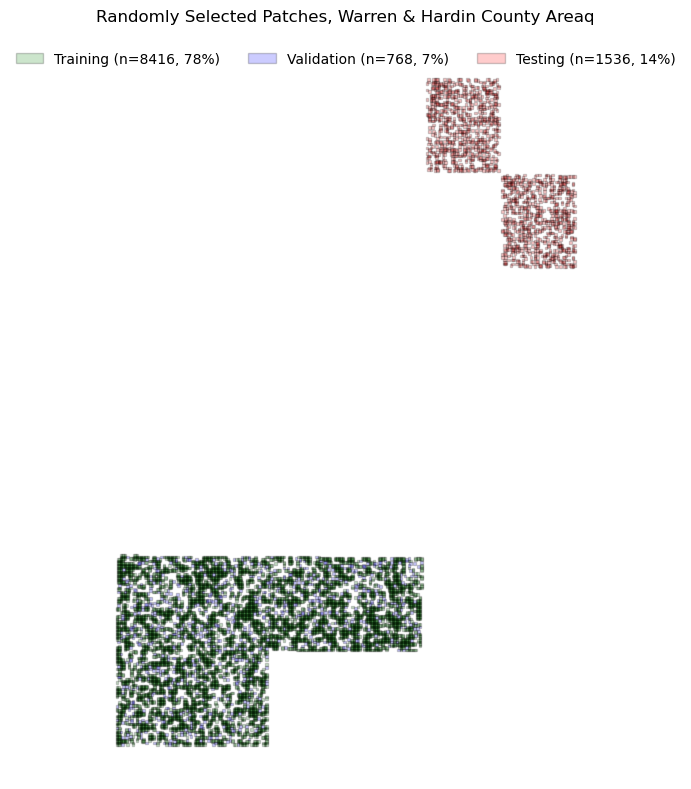

In [7]:
#############################
# Visualize Selected Patches
#############################

##### plot patches
fig, ax = plt.subplots(figsize=(10,8))

# plot
gdf_train.plot(ax=ax, facecolor='green', edgecolor='k', linewidth=1, alpha=0.2, label='Training')
gdf_val.plot(ax=ax, facecolor='blue', edgecolor='k', linewidth=1, alpha=0.2, label='Validation')
gdf_test2.plot(ax=ax, facecolor='red', edgecolor='k', linewidth=1, alpha=0.2, label='Testing')

# count information
total_patches = len(gdf_train) + len(gdf_val) + len(gdf_test2)
train_percent = len(gdf_train) / total_patches * 100
val_percent = len(gdf_val) / total_patches * 100
test_percent = len(gdf_test2) / total_patches * 100

# legend labels
train_subtitle = f"Training (n={len(gdf_train)}, {int(train_percent)}%)"
val_subtitle = f"Validation (n={len(gdf_val)}, {int(val_percent)}%)"
test_subtitle = f"Testing (n={len(gdf_test2)}, {int(test_percent)}%)"

# legend patches
train_patch = Patch(facecolor='green', edgecolor='k', linewidth=1, alpha=0.2, label=train_subtitle)
val_patch = Patch(facecolor='blue', edgecolor='k', linewidth=1, alpha=0.2, label=val_subtitle)
test_patch = Patch(facecolor='red', edgecolor='k', linewidth=1, alpha=0.2, label=test_subtitle)
ax.legend(handles=[train_patch, val_patch, test_patch], loc='center', bbox_to_anchor=(0.5, 0.98), frameon=False, ncols=3)

# custom plot settings & saving
ax.set_title('Randomly Selected Patches, Warren & Hardin County Areaq')
ax.set_axis_off()
plt.tight_layout()
plt.savefig(f"{patch_dir}/warren_hardin_patches.jpg")
plt.show()

## *Class Distributions*

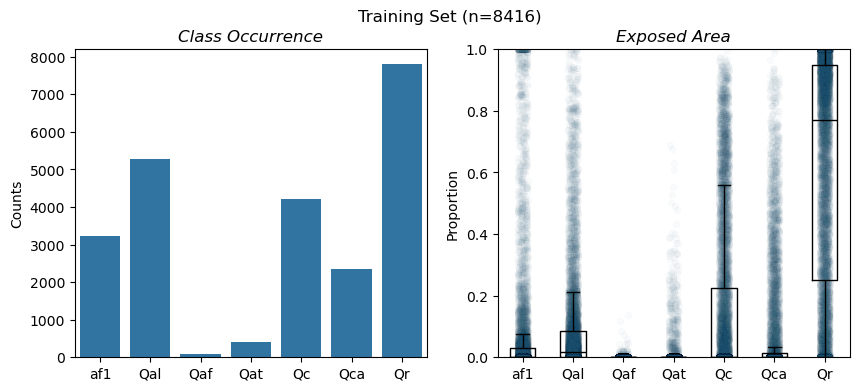

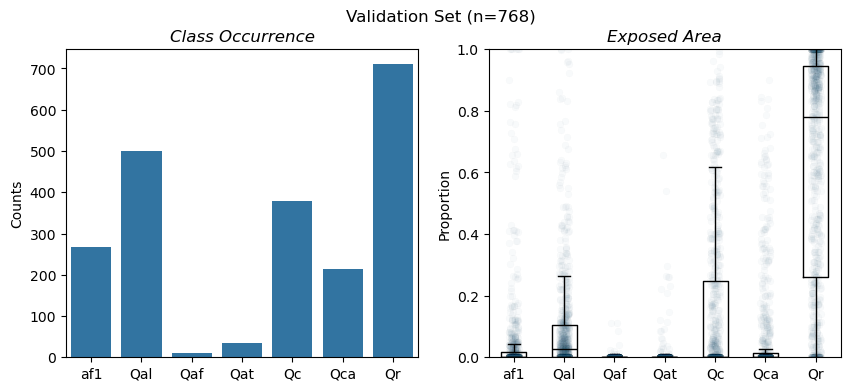

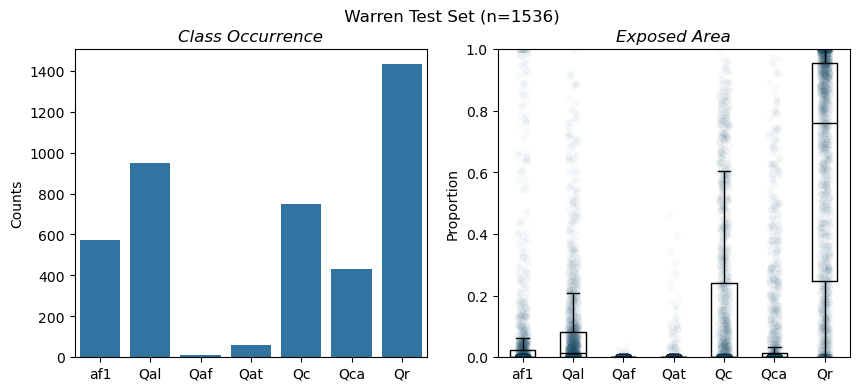

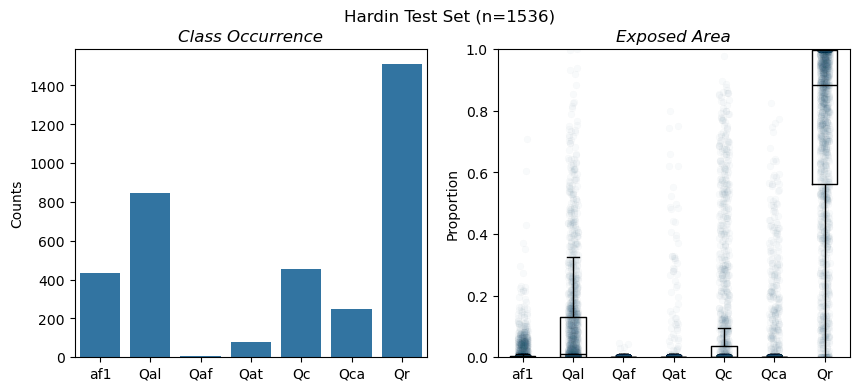

In [19]:
# labels = pd.read_csv(labels_path)
# hardin_labels = pd.read_csv(hardin_labels_path)

# areas = pd.read_csv(areas_path)
# hardin_areas = pd.read_csv(hardin_areas_path)


train_ids = gpd.read_file(r'../models/patches/warren_patches_train.geojson')['patch_id'].to_list()
val_ids = gpd.read_file(r'../models/patches/warren_patches_val.geojson')['patch_id'].to_list()
test_ids = gpd.read_file(r'../models/patches/warren_patches_test.geojson')['patch_id'].to_list()

titles = ['Training Set', 'Validation Set', ' Warren Test Set']
patch_ids = [train_ids, val_ids, test_ids]

for set_name, patches in zip(titles, patch_ids):
    patches = [patch for patch in patches]
    fig = plot_class_distributions(patches, labels_path, areas_path, set_name)
    fig.savefig(f"{patch_dir}/{set_name.replace(' ', '')}_distribution.jpg")
    plt.show(fig)


hardin_test_ids = gpd.read_file(r'../models/patches/hardin_patches_test.geojson')['patch_id'].to_list()
fig = plot_class_distributions(hardin_test_ids, hardin_labels_path, hardin_areas_path, 'Hardin Test Set')
fig.savefig(f"{patch_dir}/HardinTestSet_distribution.jpg")
plt.show(fig)